<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


## Load and Prepare Data

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test2 = pd.read_csv("sampleSubmission.csv")
df_test2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## EDA

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.shape

(418, 11)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train['Survived'].value_counts(normalize=True)* 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [ ]:
pd.crosstab( df_train.Sex, df_train.Survived )

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
df_train.groupby( ['Pclass', 'Sex'] )['Fare'].mean().reset_index()

,Pclass,Sex,Fare
0,1,female,106.125798
1,1,male,67.226127
2,2,female,21.970121
3,2,male,19.741782
4,3,female,16.118810
5,3,male,12.661633


## Data Preprocessing

In [ ]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.drop(columns=['Age' ,'Cabin','PassengerId','Name','Ticket' ],inplace=True)
df_test.drop(columns=['Age' ,'Cabin','PassengerId','Name','Ticket' ],inplace=True)

In [ ]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df_train.Sex=df_train.Sex.map({'male':1,'female':0})
df_train.Embarked=df_train.Embarked.map({'S':2,'C':1 ,'Q':0 })
df_test.Sex=df_test.Sex.map({'male':1,'female':0})
df_test.Embarked=df_test.Embarked.map({'S':2,'C':1 ,'Q':0 })

In [ ]:
df_train.Embarked.mode()

0    2.0
dtype: float64

In [ ]:
df_train.Embarked.replace({np.nan:2},inplace=True)

In [ ]:
df_test.Fare.replace({np.nan:df_test.Fare.mean()},inplace=True)

## Strorytelling - Visualization

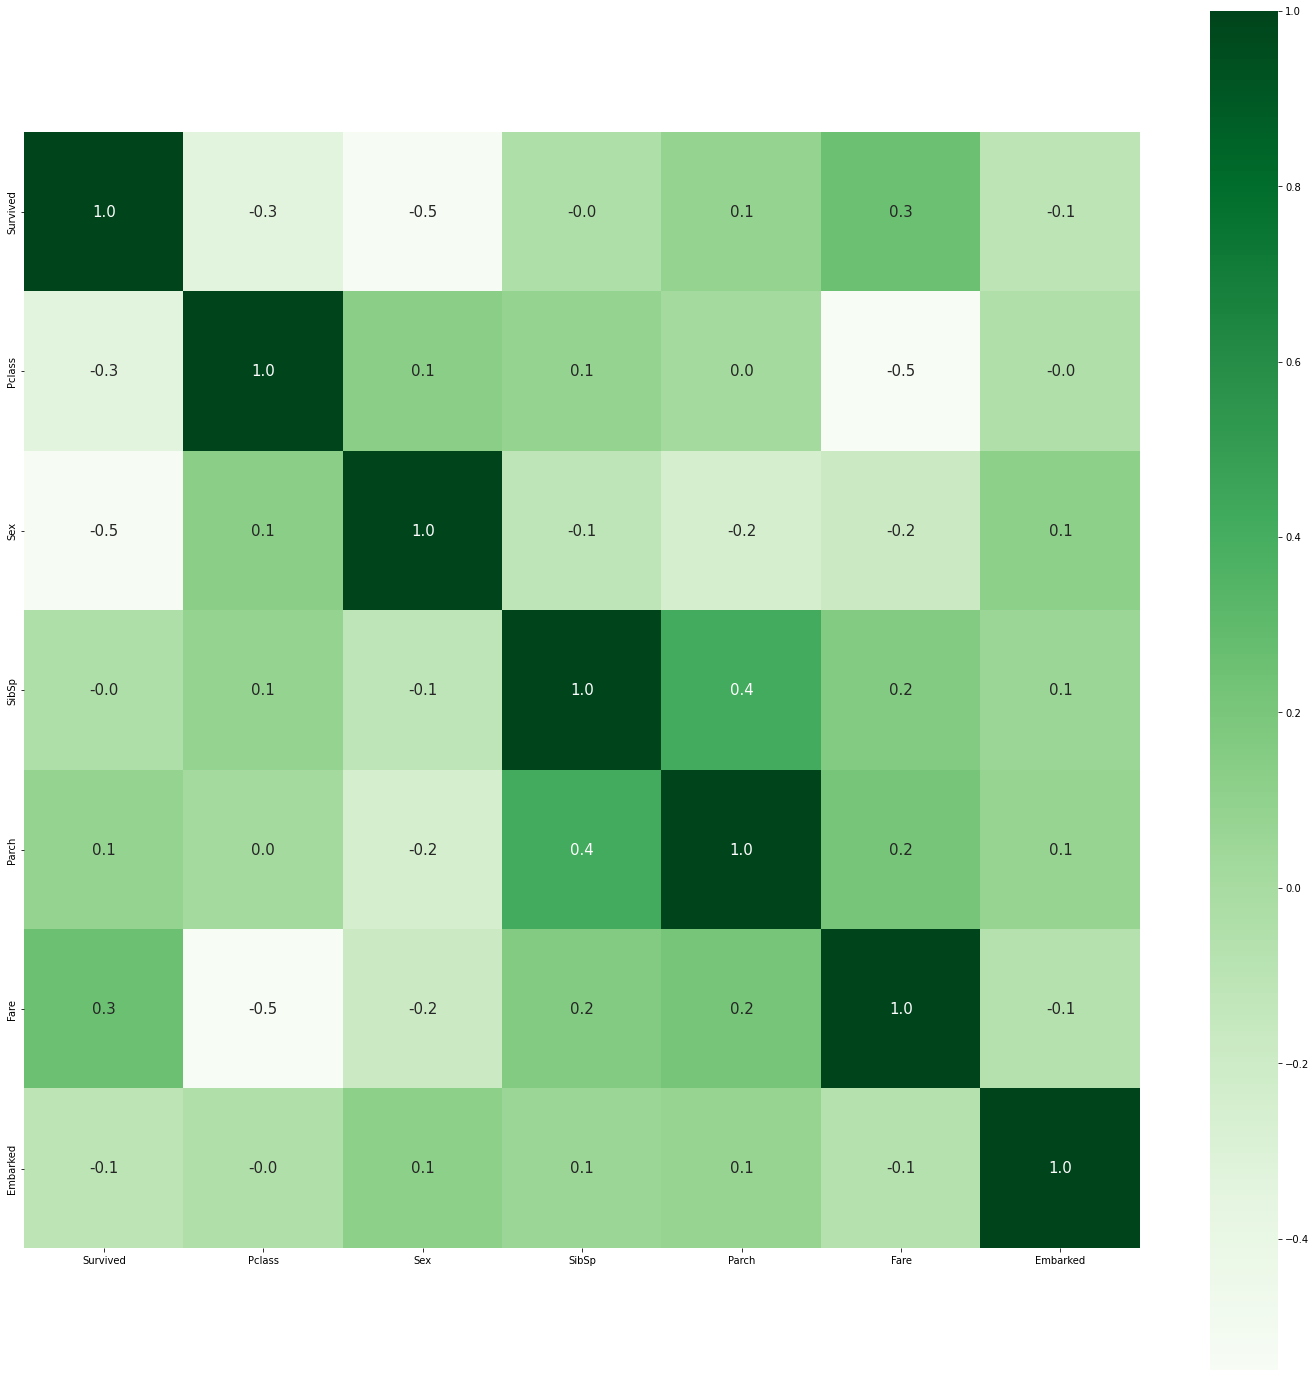

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

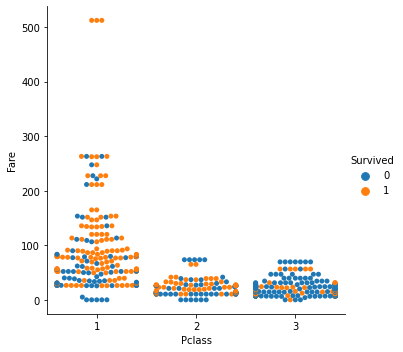

In [ ]:
sns.catplot(x='Pclass', y="Fare", hue='Survived',kind="swarm", data=df_train)

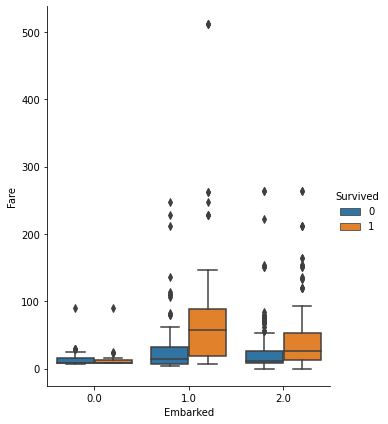

In [ ]:
ax=sns.catplot(x="Embarked", y="Fare", hue="Survived",kind="box", data=df_train, height=6, aspect=0.8)
ax.set(xlabel='Embarked', ylabel='Fare')
plt.show()

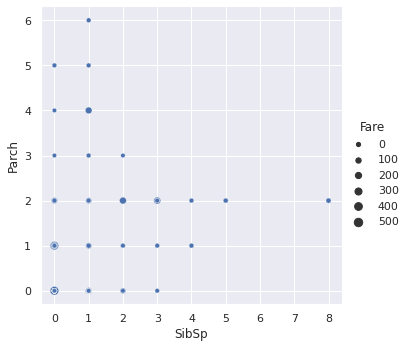

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(x="SibSp", y="Parch", size='Fare',data=df_train)

## Train your model (Classification)

In [ ]:
X_train=df_train.drop(columns=['Survived']).values
X_test=df_test.values
y_train=df_train['Survived'].values
y_test=df_test2['Survived'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions_LR=regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions_LR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions_LR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions_LR)))
print('R_Squared Score :', np.sqrt(r2_score(y_test, y_predictions_LR)))

Mean Absolute Error: 0.22000461641146712
Mean Squared Error: 0.06707563530760179
Root Mean Squared Error: 0.25898964324389845
R_Squared Score : 0.8426965249335057


In [ ]:
LRE=[metrics.mean_absolute_error(y_test, y_predictions_LR), metrics.mean_squared_error(y_test, y_predictions_LR) ,np.sqrt(metrics.mean_squared_error(y_test, y_predictions_LR)),np.sqrt(r2_score(y_test, y_predictions_LR))]

# KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_predictions_knn=knn_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions_knn)))
print('R_Squared Score :', np.sqrt(r2_score(y_test, y_predictions_knn)))

Mean Absolute Error: 0.21244019138755985
Mean Squared Error: 0.10239234449760769
Root Mean Squared Error: 0.3199880380539368
R_Squared Score : 0.7466718134444885


In [ ]:
KNNE=[metrics.mean_absolute_error(y_test, y_predictions_knn), metrics.mean_squared_error(y_test, y_predictions_knn) ,np.sqrt(metrics.mean_squared_error(y_test, y_predictions_knn)),np.sqrt(r2_score(y_test, y_predictions_knn))]

# DecisionTreeRegressor

In [ ]:
Decision_model = DecisionTreeRegressor()
Decision_model.fit(X_train, y_train)
y_predictions_DT=Decision_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions_DT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions_DT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions_DT)))
print('R_Squared Score :', np.sqrt(r2_score(y_test, y_predictions_DT)))

Mean Absolute Error: 0.18137987144143058
Mean Squared Error: 0.1318449648505266
Root Mean Squared Error: 0.36310461970419294
R_Squared Score : 0.655927893823657


In [ ]:
DTE=[metrics.mean_absolute_error(y_test, y_predictions_DT), metrics.mean_squared_error(y_test, y_predictions_DT) ,np.sqrt(metrics.mean_squared_error(y_test, y_predictions_DT)),np.sqrt(r2_score(y_test, y_predictions_DT))]

# SVRegressor

In [ ]:
SVR_model = SVR()
SVR_model.fit(X_train, y_train)
y_predictions_svr=SVR_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions_svr)))
print('R_Squared Score :', np.sqrt(r2_score(y_test, y_predictions_svr)))

Mean Absolute Error: 0.1664098449194687
Mean Squared Error: 0.06448125414632268
Root Mean Squared Error: 0.25393159343871075
R_Squared Score : 0.8493225924291277


In [ ]:
SVE=[metrics.mean_absolute_error(y_test, y_predictions_svr), metrics.mean_squared_error(y_test, y_predictions_svr) ,np.sqrt(metrics.mean_squared_error(y_test, y_predictions_svr)),np.sqrt(r2_score(y_test, y_predictions_svr))]

# RandomForestRegressor

In [ ]:
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)
y_predictions_RF=RandomForest_model.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions_RF)))
print('R_Squared Score :', np.sqrt(r2_score(y_test, y_predictions_RF)))

Mean Absolute Error: 0.1939562466430036
Mean Squared Error: 0.09957252824048528
Root Mean Squared Error: 0.3155511499590602
R_Squared Score : 0.7547876731453612


In [ ]:
RFE=[metrics.mean_absolute_error(y_test, y_predictions_RF), metrics.mean_squared_error(y_test, y_predictions_RF) ,np.sqrt(metrics.mean_squared_error(y_test, y_predictions_RF)),np.sqrt(r2_score(y_test, y_predictions_RF))]

# xgbRegressor

In [ ]:
reg_mod = xgb.XGBRegressor()
reg_mod.fit(X_train, y_train)
y_predictions_xgb = reg_mod.predict(X_test)

[09:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predictions_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predictions_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions_xgb)))
print('R_Squared Score :', np.sqrt(r2_score(y_test, y_predictions_xgb)))

Mean Absolute Error: 0.20649058959986033
Mean Squared Error: 0.07129169095589596
Root Mean Squared Error: 0.2670050391956975
R_Squared Score : 0.8318161153751082


In [ ]:
XGBE=[metrics.mean_absolute_error(y_test, y_predictions_xgb), metrics.mean_squared_error(y_test, y_predictions_xgb) ,np.sqrt(metrics.mean_squared_error(y_test, y_predictions_xgb)),np.sqrt(r2_score(y_test, y_predictions_xgb))]

## Test Result

In [ ]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('xgb', xgb.XGBRegressor()))

In [ ]:
results=[]
names=[]
for name, model in models:
    #kfold = KFold(n_splits=10, random_state=42)
    Results = cross_val_score(model, X_train, y_train, cv=10)
    results.append(Results)
    names.append(name)

[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

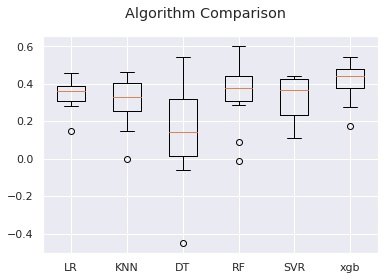

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

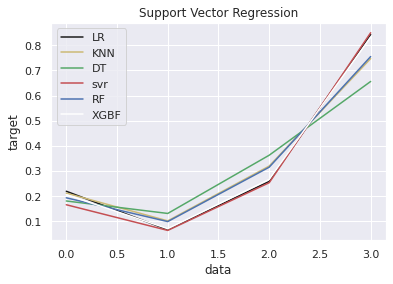

In [ ]:
import pylab as pl
pl.plot(LRE, c='k', label='LR')
pl.plot(KNNE, c='y', label='KNN')
pl.plot(DTE, c='g', label='DT')
pl.plot(SVE, c='r', label='svr')
pl.plot(RFE, c='b', label='RF')
pl.plot(XGBE, c='w', label='XGBF')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

In [ ]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [ ]:
grid_search = GridSearchCV(SVR(),
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)

In [ ]:
grid_search.fit(X_train, y_train)
y_predictions_grid_search_svr=grid_search.predict(X_test)

In [ ]:
y_predictions=np.zeros(y_predictions_grid_search_svr.size)
for i in np.arange(0, y_predictions_grid_search_svr.size-1):
    if  y_predictions_grid_search_svr[i,] >= 0.5:
        y_predictions[i,]= 1

y_predictions


array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))
print('R_Squared Score :', np.sqrt(r2_score(y_test,y_predictions)))

Mean Absolute Error: 0.04066985645933014
Mean Squared Error: 0.04066985645933014
Root Mean Squared Error: 0.20166768818858946
R_Squared Score : 0.9078811157308824


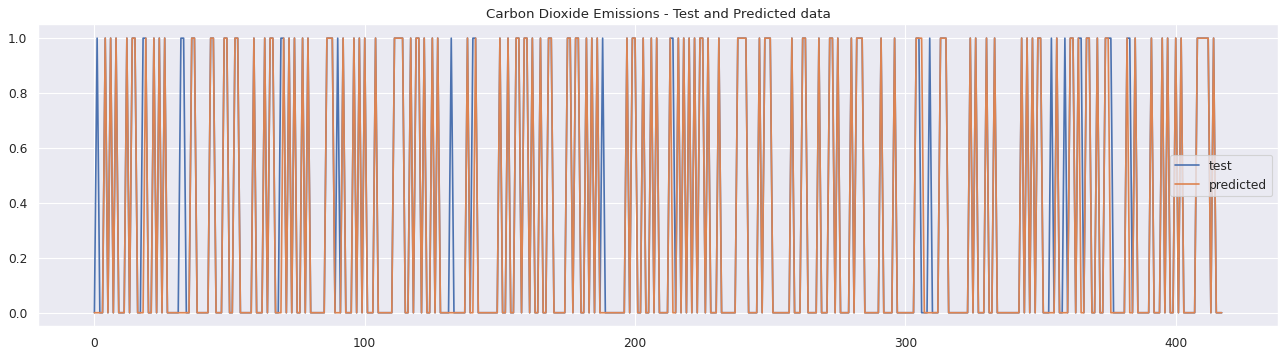

In [ ]:
plt.figure(figsize=(20, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, y_predictions, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

In [ ]:
#بدلیل عدم نصب مدل جی بی ایکس در سیستم ، این مدل فقط کد وارد کردم ولی ما بقی روش ها رو در نظر گرفتم

In [ ]:
# از بین مدل های مورد بررسی قرار گرفته ، مدل  اس وی ار از همه بهتر می باشد که در نهایت با مدل گرید سرچ با بهترین پارامتر آموزش داده شده و چون خروجی 0 یا 1 هست از چند خط کد در نهایت برای تبدیل داده های پیش بینی شده به صفر و یک استفاده شد و درنهایت خروجی نهایی با خروجی واقعی مقایسه گردید